# 2. 우한폐렴

## 2-1. 문제 정의 및 가설 수렴
* 문제 정의 : 국가 별 코로나 바이러스 현황 분석
* 가설 설립 : 미국과 유럽 부근의 확진자가 가장 많을 것이다.

## 2-2. 데이터 가져오기

In [1]:
#!kaggle datasets download -d imdevskp/corona-virus-report

In [2]:
#!tar -xvf corona-virus-report.zip -C corona_data

## 2-3. 데이터 로드하기

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('corona_data/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

In [7]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
min(df['Date']), max(df['Date'])

('2020-01-22', '2020-07-27')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [12]:
df.columns = ['지역', '국가', '위도', '경도', '일자', '확진자', '사망자', '회복자', '치료중', 'WHO']
df.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2-5. EDA(탐색적 데이터 분석)

### 1. 대한민국 코로나 현황

In [11]:
koreaDF = df[df['국가'].str.contains('Korea')]
koreaDF.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific


In [12]:
koreaDF.reset_index(inplace=True)
koreaDF.head()

,index,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
0,141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
1,402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
2,663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
3,924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
4,1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

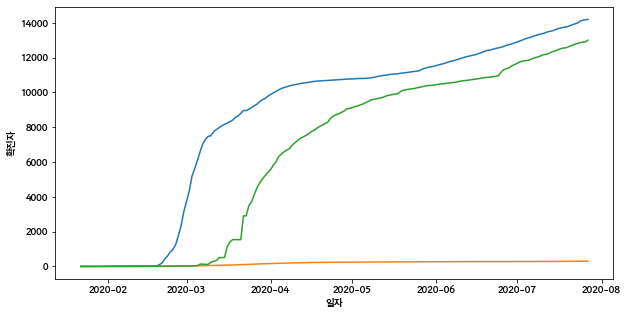

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='일자', y='확진자', data=koreaDF)
sns.lineplot(x='일자', y='사망자', data=koreaDF)
sns.lineplot(x='일자', y='회복자', data=koreaDF)
plt.figure(['확진자', '사망자', '회복자'])
plt.show()

### 2. 국가별 코로나 현황 분석

In [13]:
latesDF = df[df['일자'] == max(df['일자'])]
latesDF.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [14]:
sortedDF = latesDF.sort_values(by='확진자', ascending=False)
sortedDF.head(10)

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
49030,NaN,US,40.000000,-100.000000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,NaN,Brazil,-14.235000,-51.925300,2020-07-27,2442375,87618,1846641,508116,Americas
48936,NaN,India,20.593684,78.962880,2020-07-27,1480073,33408,951166,495499,South-East Asia
48992,NaN,Russia,61.524010,105.318756,2020-07-27,816680,13334,602249,201097,Europe
49005,NaN,South Africa,-30.559500,22.937500,2020-07-27,452529,7067,274925,170537,Africa
48963,NaN,Mexico,23.634500,-102.552800,2020-07-27,395489,44022,303810,47657,Americas
48986,NaN,Peru,-9.190000,-75.015200,2020-07-27,389717,18418,272547,98752,Americas
48854,NaN,Chile,-35.675100,-71.543000,2020-07-27,347923,9187,319954,18782,Americas
49028,NaN,United Kingdom,55.378100,-3.436000,2020-07-27,300111,45759,0,254352,Europe
48938,NaN,Iran,32.427908,53.688046,2020-07-27,293606,15912,255144,22550,Eastern Mediterranean


<AxesSubplot:xlabel='국가', ylabel='확진자'>

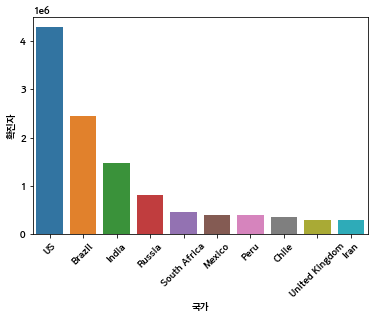

In [15]:
plt.xticks(rotation=45)
sns.barplot(x='국가', y='확진자', data=sortedDF.head(10))

In [16]:
# 전세계 확진자 현황
globalDF = df.groupby('일자')[['확진자', '사망자', '회복자']].sum()
globalDF.head()

,확진자,사망자,회복자
일자,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


<AxesSubplot:xlabel='일자'>

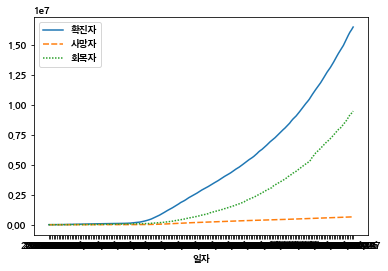

In [17]:
sns.lineplot(data=globalDF)

## 3. folium 사용하기
* 파이썬 기반의 지도 시각화 라이브러리
* http://python-visualization.github.io/folium/

In [18]:
import folium
m = folium.Map()
m

In [9]:
m = folium.Map(location = [37.34190914157451, 126.83149803264801], zoom_start = 20)
folium.CircleMarker(location = [37.34190914157451, 126.83149803264801], radius=100, color="yellow", fill="true", popup="디미고").add_to(m)
m

In [26]:
latesDF.loc[48807, '위도'], latesDF.loc[48807, '경도'], latesDF.loc[48807, '확진자']

(33.93911, 67.709953, 36263)

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
for i in latesDF.index:
    folium.CircleMarker()
m